In [1]:
import numpy as np
from sklearn.datasets import load_digits

In [2]:
data = load_digits()

In [21]:
xData = data['images']
yData = data['target']

In [22]:
xData.shape

(1797, 8, 8)

In [23]:
yData.shape

(1797,)

In [9]:
import matplotlib.pyplot as plt

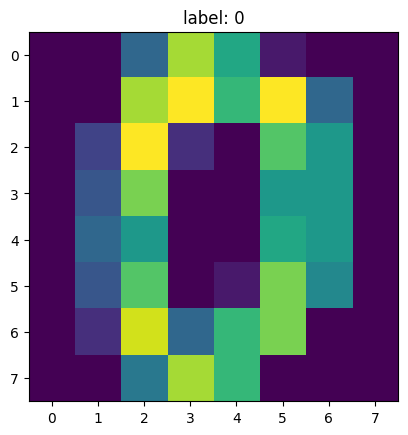

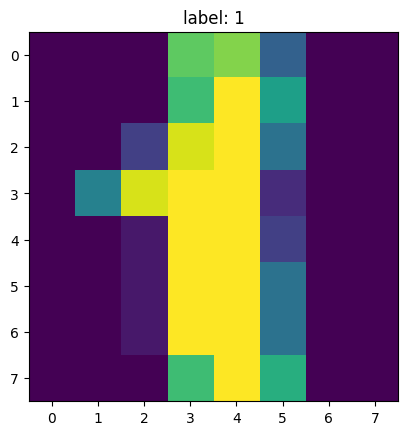

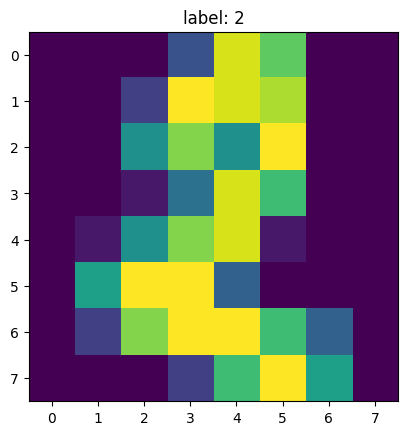

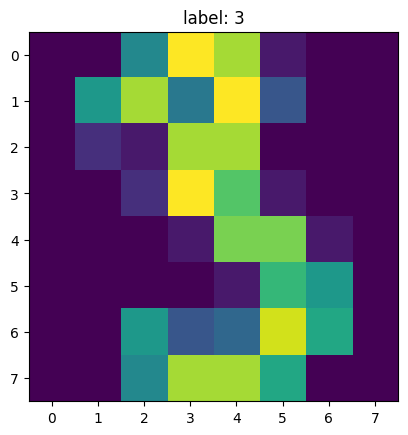

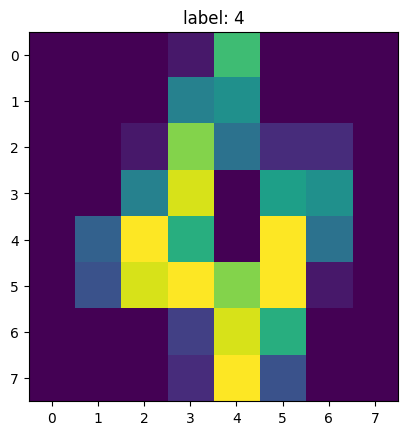

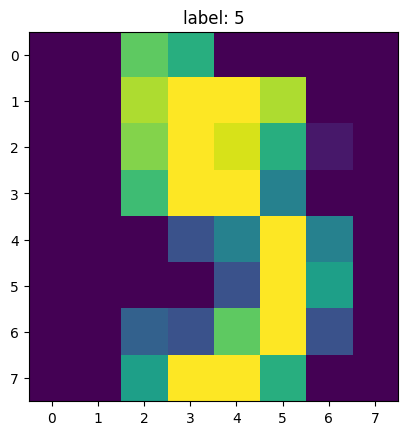

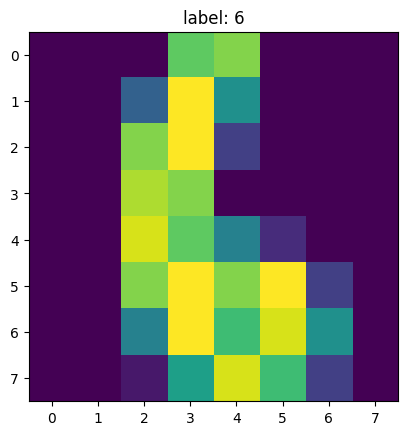

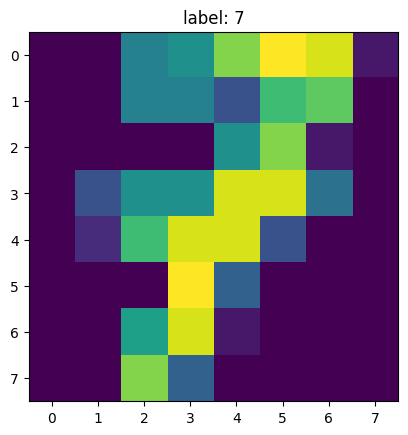

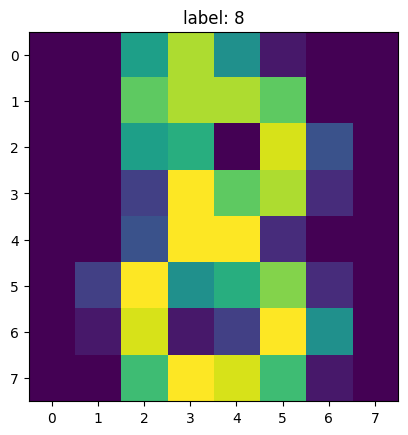

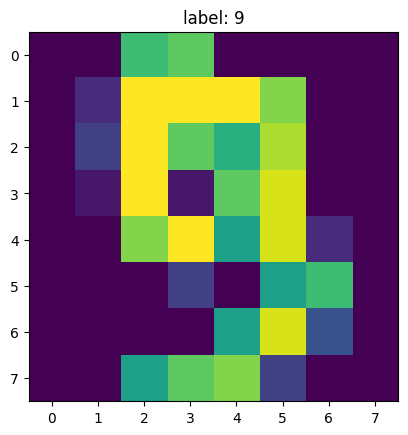

In [33]:
for i in np.unique(yData):
    idx = np.where(yData==i)[0][0]
    plt.imshow(xData[idx])
    plt.title(f"label: {i}")
    plt.show()

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [52]:
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, stratify=yData, random_state=42)

In [53]:
xTrain = xTrain.reshape((xTrain.shape[0], xTrain.shape[1]*xTrain.shape[-1]))
xTest = xTest.reshape((xTest.shape[0], xTest.shape[1]*xTest.shape[-1]))

In [54]:
xTrain = xTrain / xTrain.max()
xtest = xtest / xTrain.max()

In [55]:
model = LogisticRegression()
model.fit(xTrain, yTrain)
y_pred = model.predict(xTest)
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.51      1.00      0.68        46
           2       1.00      0.84      0.91        44
           3       1.00      0.89      0.94        46
           4       1.00      0.47      0.64        45
           5       1.00      0.91      0.95        46
           6       0.96      0.96      0.96        45
           7       1.00      0.87      0.93        45
           8       0.94      0.77      0.85        43
           9       0.79      1.00      0.88        45

    accuracy                           0.87       450
   macro avg       0.92      0.87      0.87       450
weighted avg       0.92      0.87      0.87       450



In [56]:
model = DecisionTreeClassifier()
model.fit(xTrain, yTrain)
y_pred = model.predict(xTest)
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85        45
           1       0.37      0.57      0.45        46
           2       0.42      0.25      0.31        44
           3       0.58      0.24      0.34        46
           4       0.55      0.38      0.45        45
           5       0.72      0.67      0.70        46
           6       0.72      0.87      0.79        45
           7       0.95      0.42      0.58        45
           8       0.35      0.67      0.46        43
           9       0.39      0.60      0.47        45

    accuracy                           0.54       450
   macro avg       0.60      0.54      0.54       450
weighted avg       0.60      0.54      0.54       450



In [58]:
pca = PCA()
pca.fit(xTrain)

PCA()

In [60]:
pca.explained_variance_ratio_

array([1.46460766e-01, 1.37782774e-01, 1.17198660e-01, 8.80250467e-02,
       5.70962912e-02, 4.89403909e-02, 4.24485753e-02, 3.59876845e-02,
       3.39959429e-02, 3.02366326e-02, 2.36091160e-02, 2.28635812e-02,
       1.85521600e-02, 1.74496062e-02, 1.44751695e-02, 1.44428707e-02,
       1.33584092e-02, 1.24311771e-02, 1.02979218e-02, 8.88248816e-03,
       8.64210843e-03, 8.03874458e-03, 7.60711427e-03, 7.37827037e-03,
       6.87951503e-03, 6.11864734e-03, 5.79532560e-03, 4.98442593e-03,
       4.96459931e-03, 4.36864532e-03, 3.78658999e-03, 3.57607705e-03,
       3.26436820e-03, 3.18542493e-03, 3.08954160e-03, 2.91290945e-03,
       2.59530478e-03, 2.29243768e-03, 2.24969068e-03, 2.14335269e-03,
       1.86012468e-03, 1.61302057e-03, 1.49616126e-03, 1.38979072e-03,
       1.14392690e-03, 1.04317966e-03, 9.17757850e-04, 7.66572500e-04,
       5.59235287e-04, 4.02117828e-04, 1.77985814e-04, 8.37386214e-05,
       5.15523703e-05, 4.19078006e-05, 3.00633026e-05, 6.71657612e-06,
      

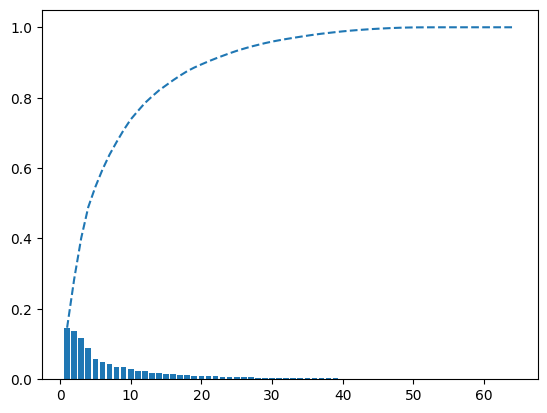

In [59]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), linestyle="--")

In [73]:
pca = PCA(n_components=40)

In [74]:
x_train_pca = pca.fit_transform(xTrain)

In [75]:
xTrain.shape

(1347, 64)

In [76]:
x_train_pca.shape

(1347, 40)

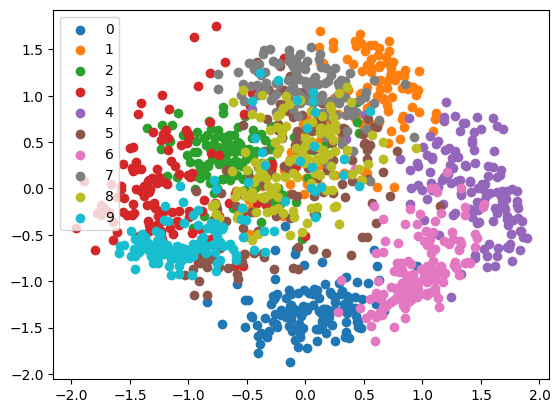

In [77]:
# NOT VALID
for i in np.unique(yTrain):
    idx = np.where(yTrain==i)[0]
    plt.scatter(x_pca[idx,0], x_pca[idx,1], label=data['target_names'][i])
plt.legend()
plt.show()

In [78]:
x_test_pca = pca.transform(xTest)

In [79]:
model = LogisticRegression()
model.fit(x_train_pca, yTrain)
y_pred = model.predict(x_test_pca)
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.50      1.00      0.67        46
           2       1.00      0.86      0.93        44
           3       0.98      0.89      0.93        46
           4       1.00      0.40      0.57        45
           5       1.00      0.91      0.95        46
           6       0.96      0.96      0.96        45
           7       1.00      0.76      0.86        45
           8       0.94      0.79      0.86        43
           9       0.75      1.00      0.86        45

    accuracy                           0.85       450
   macro avg       0.91      0.85      0.86       450
weighted avg       0.91      0.85      0.86       450

